In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv("./data_files/application_record.csv") 
# reading unclean data

In [3]:
df = pd.DataFrame(data)
# converting to dataframe

In [4]:
df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
df


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [6]:
df['AGE']=-df['DAYS_BIRTH']//365
# converting to years

In [7]:
df['WORK_EXP'] = df['DAYS_EMPLOYED'].apply(lambda val: int(-(val/365))if val < 0 else 0)
# converting to years and discarding invalid values


In [8]:
df['WORK_EXP'].value_counts()

0     108957
1      38719
2      37405
3      33524
4      30922
5      24163
6      23693
7      21648
8      19175
9      15278
10     12156
11      9518
12      8703
14      7633
13      7419
15      5243
16      3832
17      3339
19      3189
18      3035
20      2572
21      2542
22      2331
23      1722
24      1594
25      1386
26      1250
27      1205
28      1139
29       960
31       787
30       609
32       537
34       526
33       411
35       364
36       228
37       208
39       182
38       136
41       102
40       100
42        54
44        33
43        14
45         8
48         6
Name: WORK_EXP, dtype: int64

[Text(0.5, 1.0, 'Age proportions')]

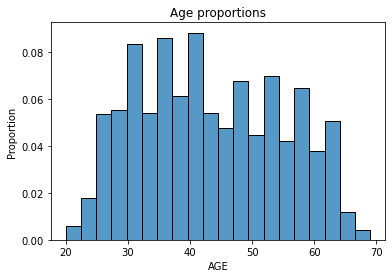

In [9]:
sns.histplot(data=df, x="AGE", bins=20, stat='proportion').set(title='Age proportions')


[Text(0.5, 1.0, 'Work experience proportions')]

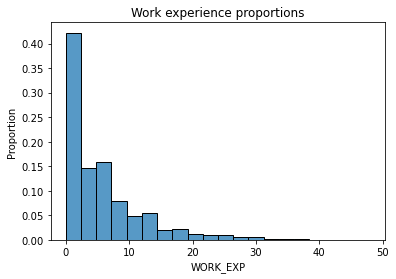

In [10]:
sns.histplot(data=df, x="WORK_EXP", bins=20, stat='proportion').set(title='Work experience proportions')


[Text(0.5, 1.0, 'Income propprtions')]

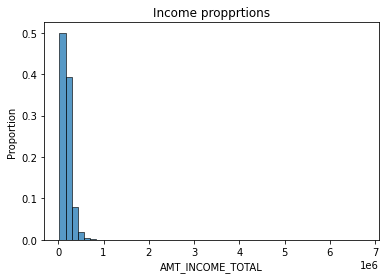

In [11]:
sns.histplot(data=df, x="AMT_INCOME_TOTAL", bins=50, stat='proportion').set(title='Income propprtions')


In [12]:
print(df['AMT_INCOME_TOTAL'].min(), df['AMT_INCOME_TOTAL'].max())


26100.0 6750000.0


[Text(0, 0.5, 'Counts'), Text(0.5, 1.0, 'Income counts violinplot')]

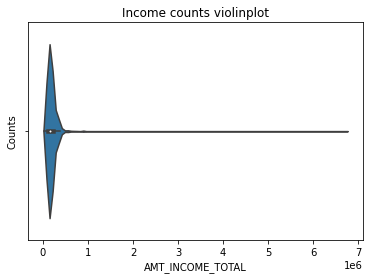

In [13]:
vplot = sns.violinplot(data=df, x="AMT_INCOME_TOTAL")
vplot.set(ylabel='Counts', title='Income counts violinplot') #setting title and y-label

[Text(0.5, 1.0, 'Income vs housing type')]

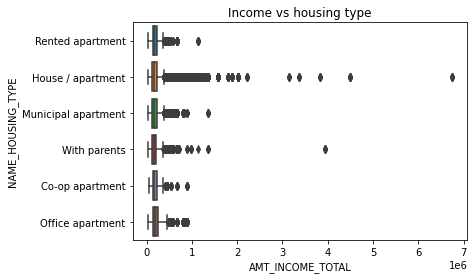

In [14]:
sns.boxplot(data=df, x="AMT_INCOME_TOTAL", y='NAME_HOUSING_TYPE').set(title='Income vs housing type')


[Text(0.5, 1.0, 'Income vs education type')]

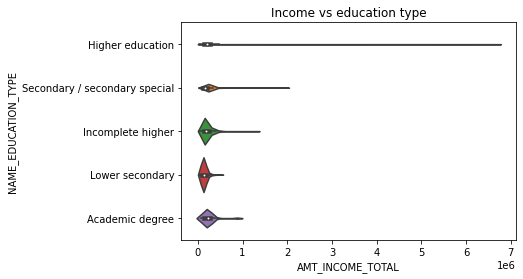

In [15]:
sns.violinplot(data=df, x="AMT_INCOME_TOTAL", y='NAME_EDUCATION_TYPE', gridsize=10, split=True).set(title='Income vs education type')


[Text(0.5, 1.0, 'Age vs Income')]

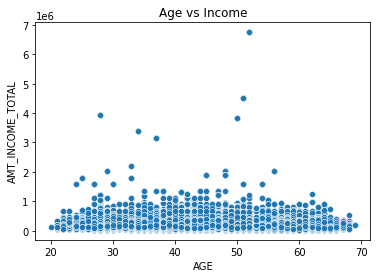

In [16]:
sns.scatterplot(data=df, x="AGE", y='AMT_INCOME_TOTAL').set(title='Age vs Income')

In [17]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

Text(0.5, 1.0, 'Education')

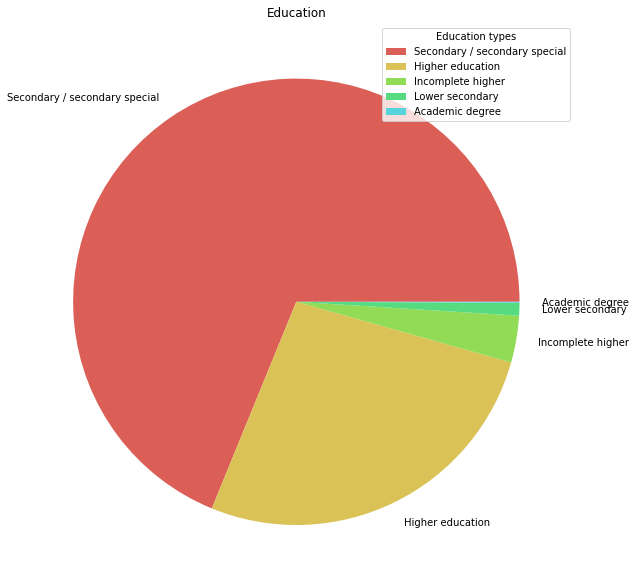

In [18]:
ax = plt.figure(figsize=(10,12))
ax.set_facecolor((1, 1, 1))

a = (df['NAME_EDUCATION_TYPE']=='Secondary / secondary special').sum()
b = (df['NAME_EDUCATION_TYPE']=='Higher education').sum()
c = (df['NAME_EDUCATION_TYPE']=='Incomplete higher').sum()
d = (df['NAME_EDUCATION_TYPE']=='Lower secondary').sum()
e = (df['NAME_EDUCATION_TYPE']=='Academic degree').sum()

piedata = np.array([a, b, c, d, e])
colors = sns.color_palette('hls',8)
labels = ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
plt.pie(piedata, labels = labels, colors=colors)
plt.legend(title = 'Education types')
plt.title("Education")

In [19]:
df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

Text(0.5, 1.0, 'Housing')

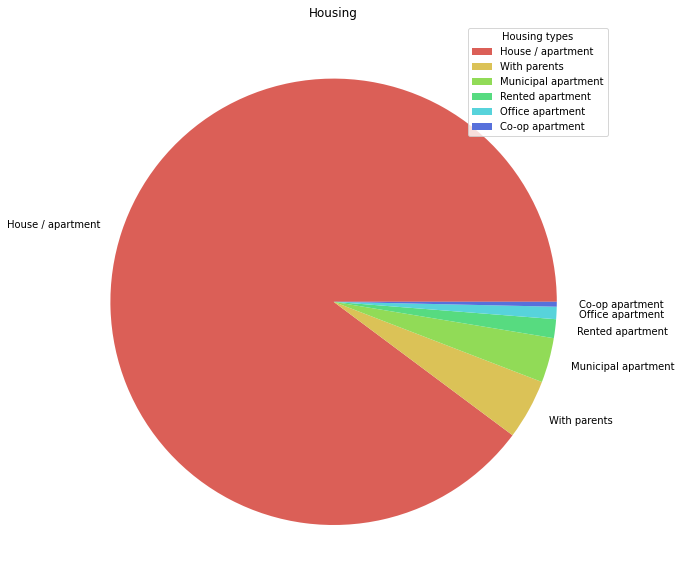

In [20]:
ax = plt.figure(figsize=(10,12))
ax.set_facecolor((1, 1, 1))

a = (df['NAME_HOUSING_TYPE']=='House / apartment').sum()
b = (df['NAME_HOUSING_TYPE']=='With parents').sum()
c = (df['NAME_HOUSING_TYPE']=='Municipal apartment').sum()
d = (df['NAME_HOUSING_TYPE']=='Rented apartment').sum()
e = (df['NAME_HOUSING_TYPE']=='Office apartment').sum()
f = (df['NAME_HOUSING_TYPE']=='Co-op apartment').sum()

piedata = np.array([a, b, c, d, e, f])
colors = sns.color_palette('hls',8)
labels = ['House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']
plt.pie(piedata, labels = labels, colors=colors)
plt.legend(title = 'Housing types')
plt.title("Housing")

<AxesSubplot:xlabel='ID', ylabel='NAME_INCOME_TYPE'>

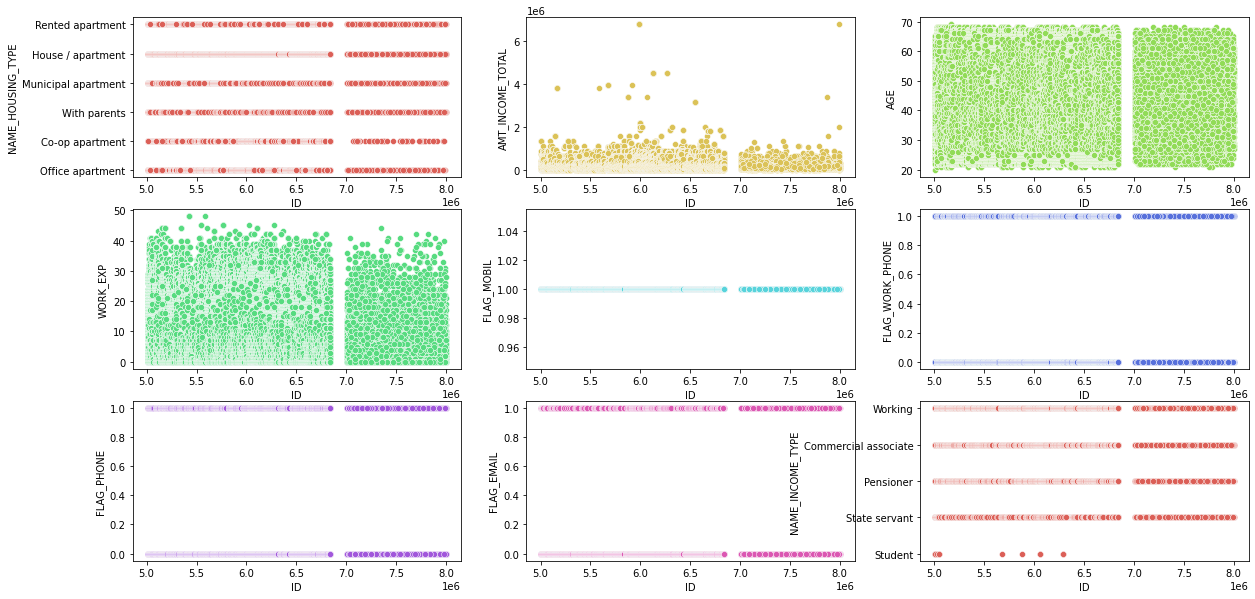

In [21]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (20,10))

sns.scatterplot(x='ID', y='NAME_HOUSING_TYPE', data=df, ax=ax[0][0], color=sns.color_palette('hls',8)[0])
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df, ax=ax[0][1], color=sns.color_palette('hls',8)[1])
sns.scatterplot(x='ID', y='AGE', data=df, ax=ax[0][2], color=sns.color_palette('hls',8)[2])

sns.scatterplot(x='ID', y='WORK_EXP', data=df, ax=ax[1][0], color=sns.color_palette('hls',8)[3])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=df, ax=ax[1][1], color=sns.color_palette('hls',8)[4])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=df, ax=ax[1][2], color=sns.color_palette('hls',8)[5])

sns.scatterplot(x='ID', y='FLAG_PHONE', data=df, ax=ax[2][0], color=sns.color_palette('hls',8)[6])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=df, ax=ax[2][1], color=sns.color_palette('hls',8)[7])
sns.scatterplot(x='ID', y='NAME_INCOME_TYPE', data=df, ax=ax[2][2], color=sns.color_palette('hls',8)[0])

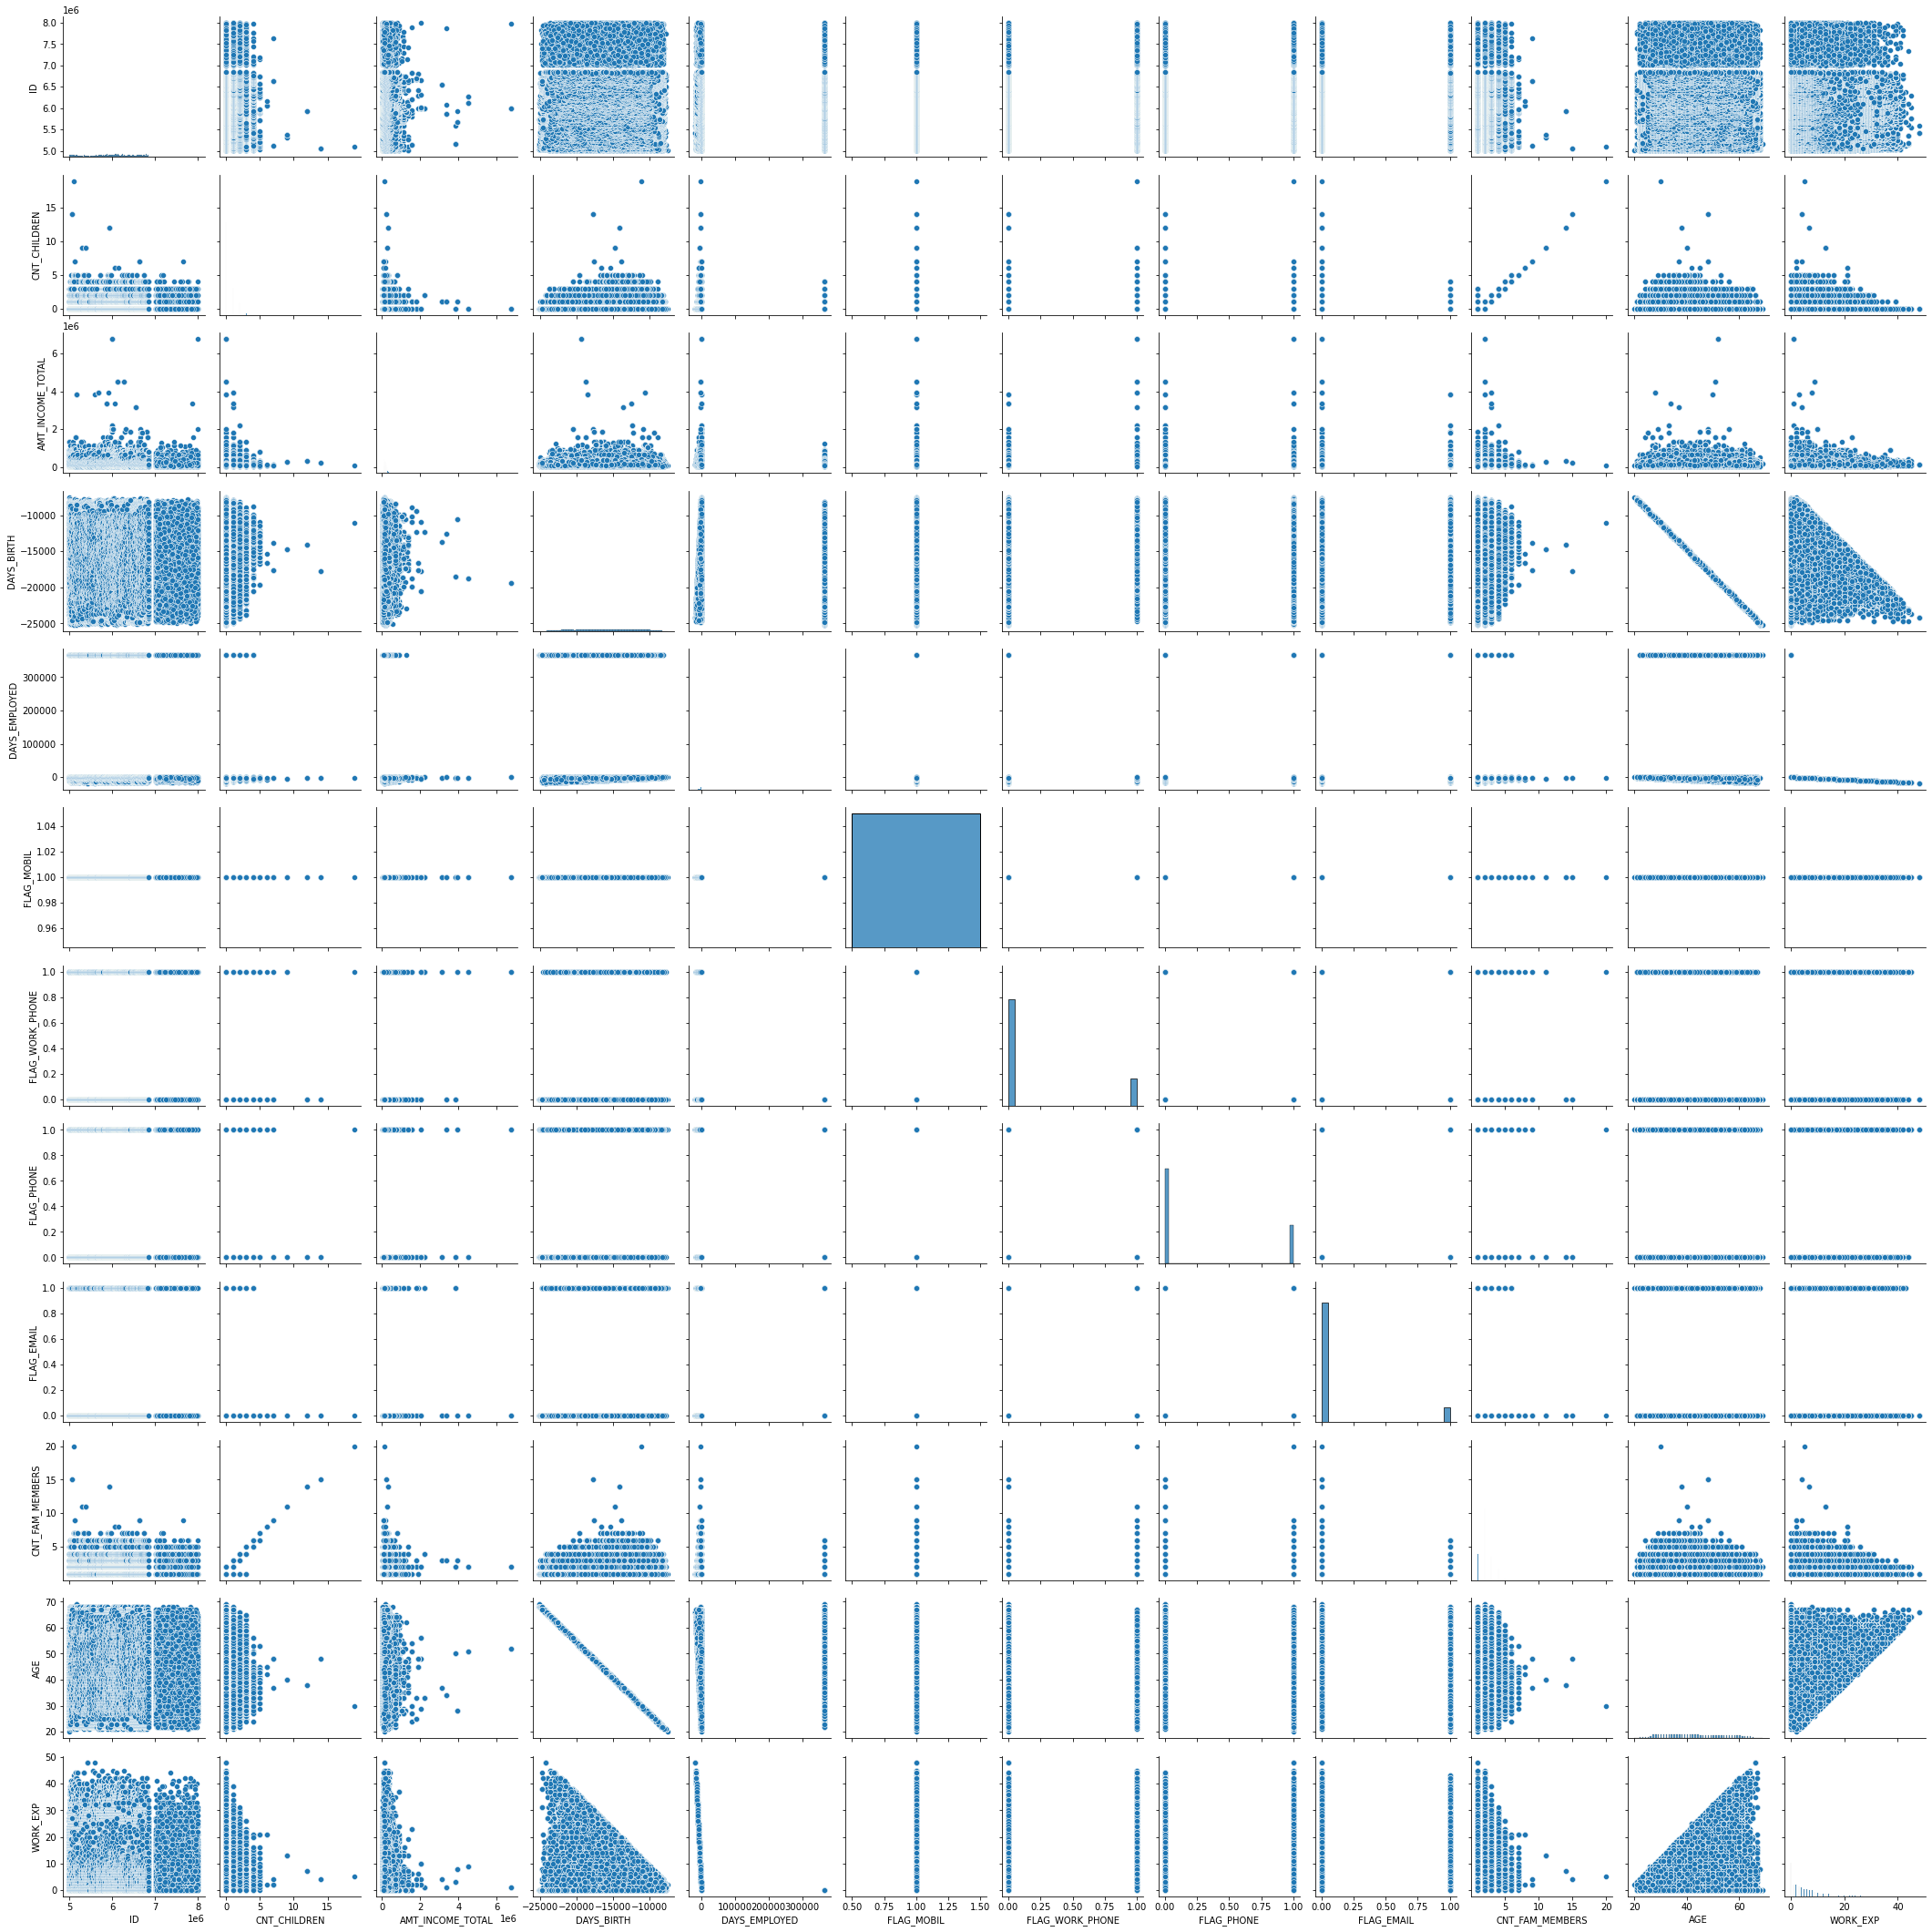

In [22]:
sns.pairplot(data=df)